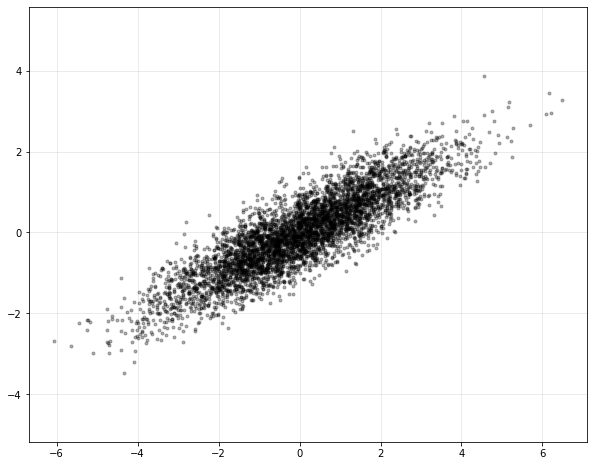

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data generation
m = 5000
mu = np.array([0, 0])
sigma = np.array([[3, 1.5], 
                  [1.5, 1]])

X = np.random.multivariate_normal(mu, sigma, m)
X = np.asmatrix(X)

fig = plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'k.', alpha = 0.3)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()


In [2]:
S = 1/(m-1)*X.T*X
 
D, U = np.linalg.eig(S)

idx = np.argsort(-D)
D = D[idx]
U = U[:,idx]

print(D, '\n')
print(U)

[3.70572949 0.18960911] 

[[ 0.88217843 -0.4709153 ]
 [ 0.4709153   0.88217843]]


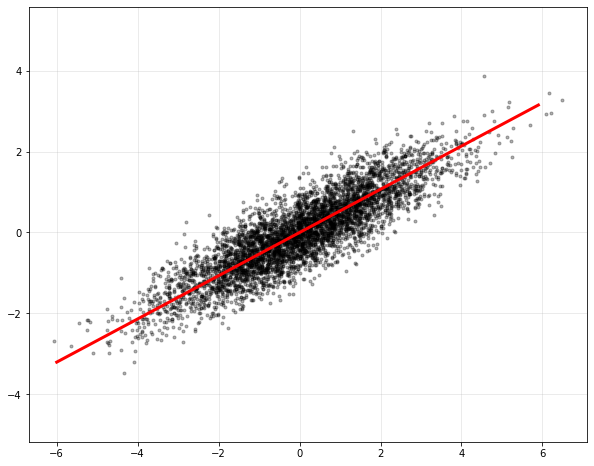

In [3]:
h = U[1,0]/U[0,0]
xp = np.arange(-6, 6, 0.1)
yp = h*xp

fig = plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'k.', alpha = 0.3)
plt.plot(xp, yp, 'r', linewidth = 3)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

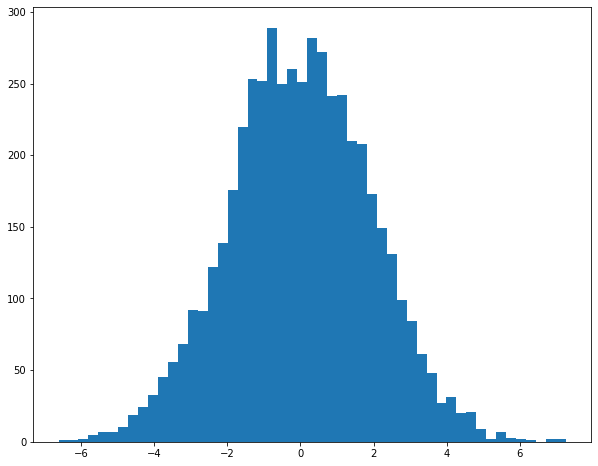

In [4]:
Z = X*U[:,0]

plt.figure(figsize = (10, 8))
plt.hist(Z, 51)
plt.show()


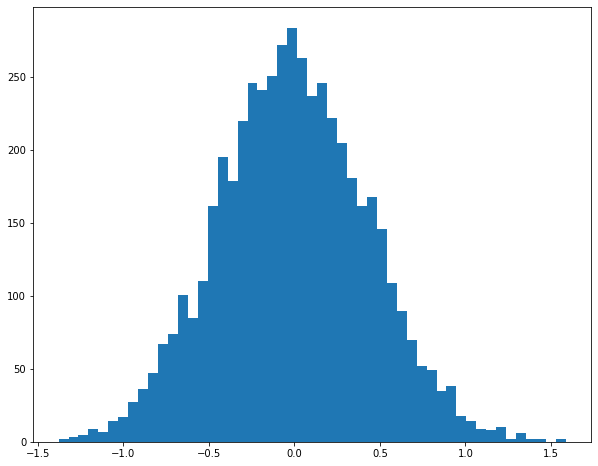

In [5]:
Z = X*U[:,1]

plt.figure(figsize = (10, 8))
plt.hist(Z, 51)
plt.show()

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
pca.fit(X)

PCA(n_components=1)

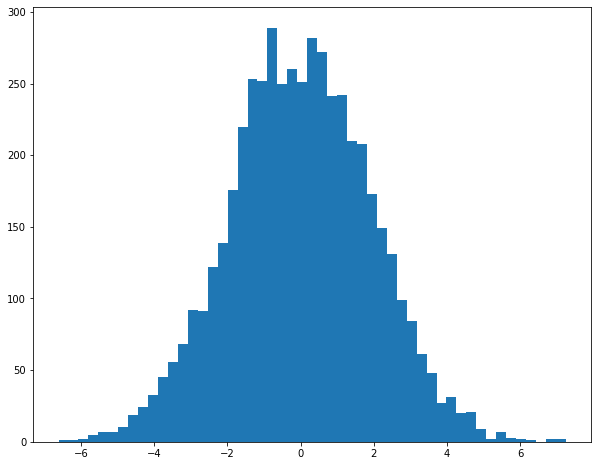

In [8]:
u = pca.transform(X)

plt.figure(figsize = (10, 8))
plt.hist(u, 51)
plt.show()

In [9]:
from six.moves import cPickle

X = cPickle.load(open('./data_files/pca_spring.pkl','rb'))
X = np.asmatrix(X.T)

print(X.shape)
m = X.shape[0]

(273, 6)


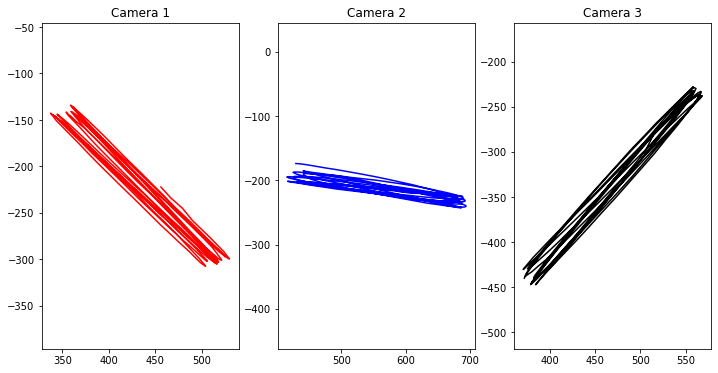

In [10]:
plt.figure(figsize = (12, 6))
plt.subplot(1,3,1)
plt.plot(X[:, 0], -X[:, 1], 'r')
plt.axis('equal')
plt.title('Camera 1')

plt.subplot(1,3,2)
plt.plot(X[:, 2], -X[:, 3], 'b')
plt.axis('equal')
plt.title('Camera 2')

plt.subplot(1,3,3)
plt.plot(X[:, 4], -X[:, 5], 'k')
plt.axis('equal')
plt.title('Camera 3')

plt.show()

In [11]:
X = X - np.mean(X, axis = 0)

S = 1/(m-1)*X.T*X
 
D, U = np.linalg.eig(S)

idx = np.argsort(-D)
D = D[idx]
U = U[:,idx]

print(D, '\n')
print(U)

[2.46033089e+04 3.22747042e+02 8.73851124e+01 8.19527660e+01
 3.19467195e+01 7.42861585e+00] 

[[ 0.36881064  0.62298194 -0.12571821 -0.42647348  0.52121775 -0.0807439 ]
 [ 0.35632379  0.57286174  0.132303    0.59881765 -0.40143215  0.08734045]
 [ 0.58419477 -0.22610057 -0.20325551 -0.47751523 -0.58153918  0.00857804]
 [ 0.08652315 -0.02671281  0.75692234 -0.14177391 -0.06010869 -0.62861422]
 [ 0.4159798  -0.29900638  0.49374948  0.05637591  0.32442517  0.62075559]
 [-0.46389987  0.37746931  0.32963322 -0.45633202 -0.34660023  0.45308403]]


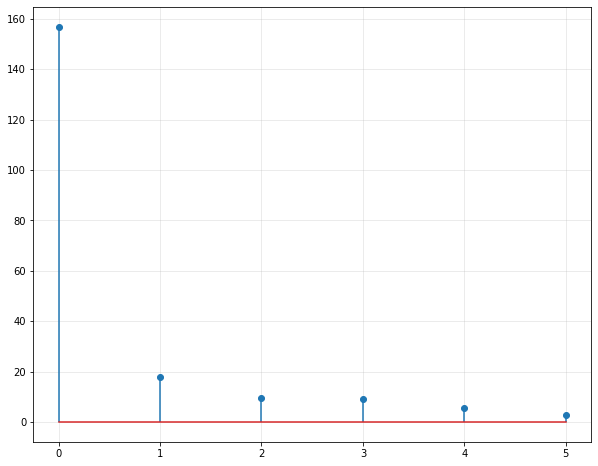

In [12]:
plt.figure(figsize = (10,8))
plt.stem(np.sqrt(D))
plt.grid(alpha = 0.3)
plt.show()

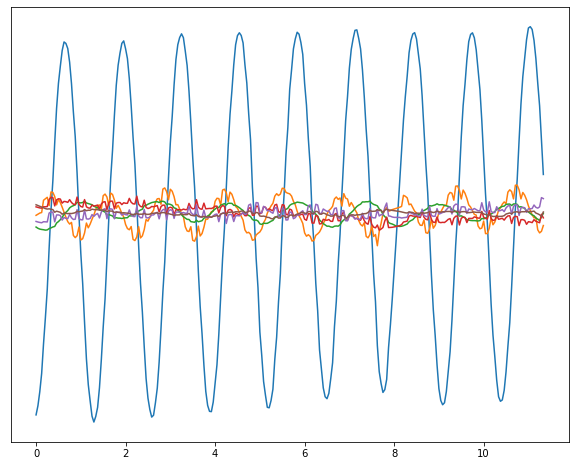

In [13]:
# relative magnitutes of the principal components

Z = X*U
xp = np.arange(0, m)/24    # 24 frame rate

plt.figure(figsize = (10, 8))
plt.plot(xp, Z)
plt.yticks([])
plt.show()

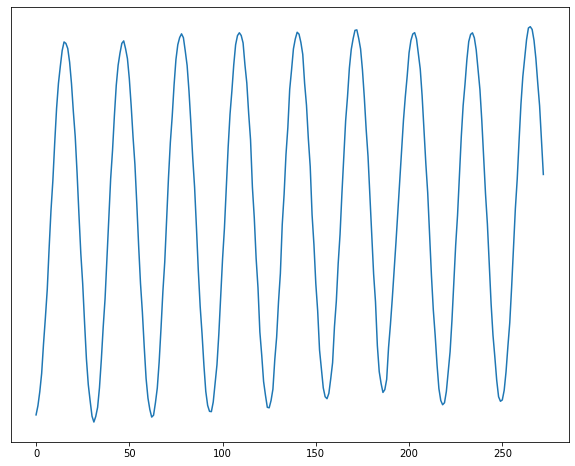

In [14]:
## projected onto the first principal component
# 6 dim -> 1 dim (dim reduction)
# relative magnitute of the first principal component

Z = X*U[:,0]

plt.figure(figsize = (10, 8))
plt.plot(Z)
plt.yticks([])
plt.show()